In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import Random
from random import seed
from random import randint

from datetime import datetime

from ipywidgets import interact, interactive, IntSlider

## Load 3D cube

In [15]:
data_train = np.load('./data/data_train.npz', allow_pickle=True, mmap_mode='r')
data_train = data_train['data']

label_train = np.load('./data/labels_train.npz', allow_pickle=True, mmap_mode='r')
label_train = label_train['labels']

#data_test = np.load('./data/data_test_1.npz', allow_pickle=True, mmap_mode='r')
#data_test = data_test['data']

In [16]:
# check the data size
print("data dim: {}".format(data_train.shape))
print("label dim: {}".format(label_train.shape))

data dim: (1006, 782, 590)
label dim: (1006, 782, 590)


## Display slices

In [17]:
def xsview(data_xs, label_xs):    
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
    fig.suptitle('Seismic Image and Label')

    im1 = ax1.imshow(data_xs,cmap='Greys')
    fig.colorbar(im1, ax=ax1)

    ax2.imshow(data_xs,cmap='Greys')
    im2 = ax2.imshow(label_xs, cmap='jet', alpha=0.4)
    fig.colorbar(im2, ax=ax2)
    
    plt.show()
    
def ilview(il):
    data_xs = data_train[:,:,il]
    label_xs = label_train[:,:,il]
    xsview(data_xs, label_xs)
    
    
def xlview(xl):
    data_xs = data_train[:,xl,:]
    label_xs = label_train[:,xl,:]
    xsview(data_xs, label_xs)

In [18]:
interactive(ilview, il=IntSlider(min=0, max=data_train.shape[2]-1, value=0, step=1, description="Inline"))

interactive(children=(IntSlider(value=0, description='Inline', max=589), Output()), _dom_classes=('widget-inte…

In [19]:
interactive(xlview, xl=IntSlider(min=0, max=data_train.shape[1]-1, value=0, step=1, description="Xline"))

interactive(children=(IntSlider(value=0, description='Xline', max=781), Output()), _dom_classes=('widget-inter…

## Create patches

In [89]:
seed(42)

N = 10000
dx = 128  # depth
dy = 128  # xline
dz = 128  # inline
res = 100 # reserve last 10 line for testing

dst_image = './data/train/' 
dst_label = './data/label/'

image_loc = []

start = datetime.now()

for i in range(N//2):
    x0,y0,z0 = randint(0, data_train.shape[0]-dx),randint(0, data_train.shape[1]-dy-res),randint(0, data_train.shape[2]-dz-res)
    
    np.savez(dst_image + 'image_il_{:05n}'.format(i), data_train[x0:x0+dx,y0:y0+dy,z0])
    np.savez(dst_label + 'label_il_{:05n}'.format(i), label_train[x0:x0+dx,y0:y0+dy,z0])

    np.savez(dst_image + 'image_xl_{:05n}'.format(i), data_train[x0:x0+dx,y0,z0:z0+dz])
    np.savez(dst_label + 'label_xl_{:05n}'.format(i), label_train[x0:x0+dx,y0,z0:z0+dz])
    

    print('\rfile#:{} '.format(i*2+2), end="")
    
    image_loc.append(['_{:05n}'.format(i),x0,y0,z0])

print("\nElapsed time: ", datetime.now() - start)

file#:10000 
Elapsed time:  0:08:27.021962


In [90]:
df = pd.DataFrame (image_loc,columns=['image_num','Depth_X0','XLine_Y0','InLine_Z0'])

In [91]:
df.head()

,image_num,Depth_X0,XLine_Y0,InLine_Z0
0,_00000,654,114,12
1,_00001,759,281,125
2,_00002,228,142,52
3,_00003,692,89,302
4,_00004,432,32,15


In [92]:
df.to_csv("./data/image_loc.csv", index=False)

In [93]:
df_loc = pd.read_csv("./data/image_loc.csv")
df_loc.head()

,image_num,Depth_X0,XLine_Y0,InLine_Z0
0,_00000,654,114,12
1,_00001,759,281,125
2,_00002,228,142,52
3,_00003,692,89,302
4,_00004,432,32,15


In [95]:
df_loc.count()

image_num    5000
Depth_X0     5000
XLine_Y0     5000
InLine_Z0    5000
dtype: int64

## QC patches

In [96]:
qc_data = np.load('./data/train/image_xl_00005.npz')
qc_label = np.load('./data/label/label_xl_00005.npz')

qc_data = qc_data['arr_0']
qc_label = qc_label['arr_0']

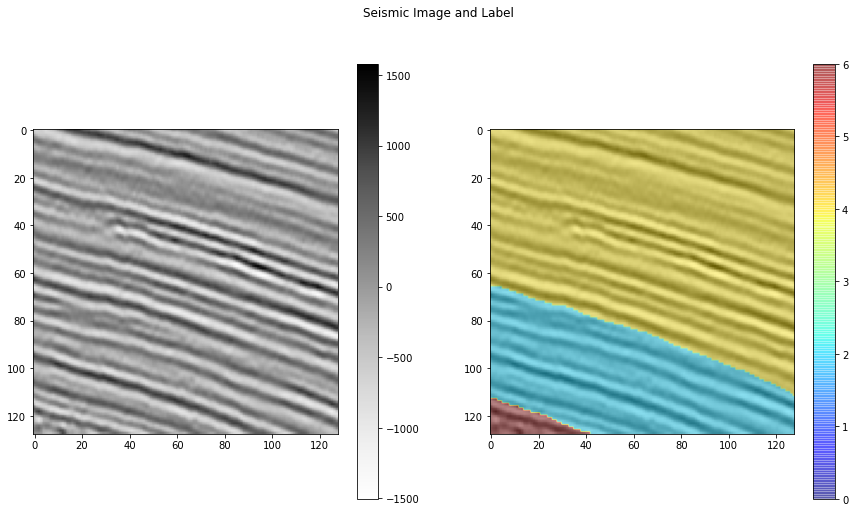

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
fig.suptitle('Seismic Image and Label')

im1 = ax1.imshow(qc_data, cmap='Greys')
fig.colorbar(im1, ax=ax1)

ax2.imshow(qc_data, cmap='Greys')
im2 = ax2.imshow(qc_label, cmap='jet', alpha=0.4)
im2.set_clim(0,6)
fig.colorbar(im2, ax=ax2)

plt.show()